## More than Meets the Ear: The Data and Elements Behind Spotify Songs
Since its humble beginnings in Sweden, **Spotify** has continually grown exponentially to become one of, if not, the world's biggest music streaming provider. Boasting an immense catalog of tracks from around the world, the music giant has gathered mounds of valuable data, both basic and complex, behind the songs deployed in its massive database. For this Notebook, the researchers **Anjelo Antioquia**, **Gabriel Minamedez**, and **Julian Sunpayco** will report their findings in this case study centered around a dataset gathered from online data science community Kaggle related to the songs in Spotify.

This is in partial fulfillment of the course **Statistical Modelling and Simulation (CSMODEL)**.

## Import
Import Python modules **numpy**, **pandas**, and **matplotlib**, and the **`tools.py`** script for custom functions and/or classes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tools
from scipy.stats import ttest_ind

## Dataset: The Spotify Dataset
The [Spotify dataset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data.csv) (titled **`data.csv`**) consists of 160,000+ tracks from 1921-2020 found in Spotify as of June 2020. Collected by Kaggle user and Turkish Data Scientist Yamaç Eren Ay, the data was retrieved and tabulated from the **Spotify Web API**. Each row in the dataset corresponds to a track, with variables such as the title, artist, and year located in their respective columns. Aside from the fundamental variables, musical elements of each track, such as the tempo, danceability, and key, were likewise extracted; the algorithm for these values were generated by Spotify based on a range of technical parameters.

Let's bring in that dataset now:

In [2]:
main_df = pd.read_csv("./data.csv")
main_df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


With a huge array of variables present as seen above, it may seem overwhelming, but don't be! Together, these variables describe a track in each row, giving each some interesting numerical context across different parameters. Below is the list of variables and their descriptions:
- **`id`**: A unique identifier for each track.
- **`name`**: The track's title.
- **`artists`**: Artist/s who participated in the track.
- **`duration_ms`**: Length of the track in milliseconds (ms).
- **`release_date`**: The track's release date in MM/DD/YYYY, or at the minimum, YYYY.
- **`year`**: The year in which the track was released.
- **`acousticness`***: A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **`danceability`***: Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.
- **`energy`***: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast and loud.
- **`instrumentalness`***: Predicts whether a track contains no vocals.
- **`liveness`***: Detects the presence of an audience in the recording.
- **`loudness`***: The overall loudness of a track in decibels (dB).
- **`speechiness`***: Detects the presence of spoken words in a track.
- **`tempo`***: The overall estimated tempo of a track in beats per minute (BPM).
- **`valence`***: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- **`mode`**: Melodic content from the modality of a track. 1 = Major; 0 = Minor.
- **`key`**: The estimated overall key of a track from the [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **`popularity`**: A track's popularity, 0-100 where 100 is the most popular based on [Spotify's algorithm](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).
- **`explicit`**: Whether or not the track has explicit lyrics. 1 = True; 0 = False.

*Based on the [audio features of a track from Spotify's Web API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/).

Let's now check the specific information for the variables of this dataset and see if cleaning is needed:

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

With 169,909 tracks in total and every variable filled, it's looking good so far! However, let's dig in some more just in case there are anomalies with the data themselves. Let's use the `pd.Series.unique()` function to check the variables with limited choices of possible values (rules indicated in comments for each print statement):

In [4]:
print(main_df["mode"].unique()) # Should be either 0 or 1
print(main_df["key"].unique()) # Should be values from 0 to 11, or -1
print(main_df["explicit"].unique()) # Should be either 0 or 1

[1 0]
[10  8  5  1 11  6  9  7  4  2  3  0]
[0 1]


It looks like the variables `mode`, `key`, and `explicit` are good to go. Let's now check the variables supposedly bound within a given range:

In [5]:
print(str(main_df["year"].min()) + " – " + str(main_df["year"].max())) # Range: [1921 – 2020]
print(str(main_df["acousticness"].min()) + " – " + str(main_df["acousticness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["danceability"].min()) + " – " + str(main_df["danceability"].max())) # Range: [0.0 – 1.0]
print(str(main_df["energy"].min()) + " – " + str(main_df["energy"].max())) # Range: [0.0 – 1.0]
print(str(main_df["instrumentalness"].min()) + " – " + str(main_df["instrumentalness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["liveness"].min()) + " – " + str(main_df["liveness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["speechiness"].min()) + " – " + str(main_df["speechiness"].max())) # Range: [0.0 – 1.0]
print(str(main_df["valence"].min()) + " – " + str(main_df["valence"].max())) # Range: [0.0 – 1.0]
print(str(main_df["popularity"].min()) + " – " + str(main_df["popularity"].max())) # Range: [0 – 100]

1921 – 2020
0.0 – 0.996
0.0 – 0.988
0.0 – 1.0
0.0 – 1.0
0.0 – 1.0
0.0 – 0.9690000000000001
0.0 – 1.0
0 – 100


Looks like this dataset is officially good to go for analysis! We can now move on to the **Exploratory Data Analysis** with the Spotify tracks.

## Exploratory Data Analysis (EDA) on Spotify Data
Being datasets teeming with variables, the researchers have the opportunity to identify trends in the musical elements. It may be in the form of an evolutionary timeline of musical elements between decades. It may also be a comparison of musical elements among genres. From the data, the researchers may also determine assumptions on musical evolution. Without further ado, we'll start with...

missing: summary statistics and comprehensive analysis/report

### EDA #1: The evolution of different musical elements through the years.
Given the different musical elements provided, it will be interesting to see how these facets have evolved through the years. Are songs faster in pace now?  Has autotune really taken over the industry? How about the general tone of the songs?

The researchers made a judgement call of handpicking 6 of the 9 musical elements, namely **acousticness**, **danceability**, **energy**, **instrumentalness**, **speechiness**, and **valence** given that these fields are measured at the same confidence range of 0.0 – 1.0. The **loudness** and **tempo**, meanwhile, are measured in decibels (dB) and beats per minute (BPM), respectively. Furthermore, the researchers chose to disregard **liveness** as it is merely a measure of whether or not a track was performed live or through a recording studio.

We then create a line graph for each element in order to display the mean values (by year) of the elements present in all songs grouped through the years. Since we have 6 elements to explore, we should have 6 line graphs in total, plotted in a subplot `sp1` (a feature of the **matplotlib** module to show multiple graphs in one cell):

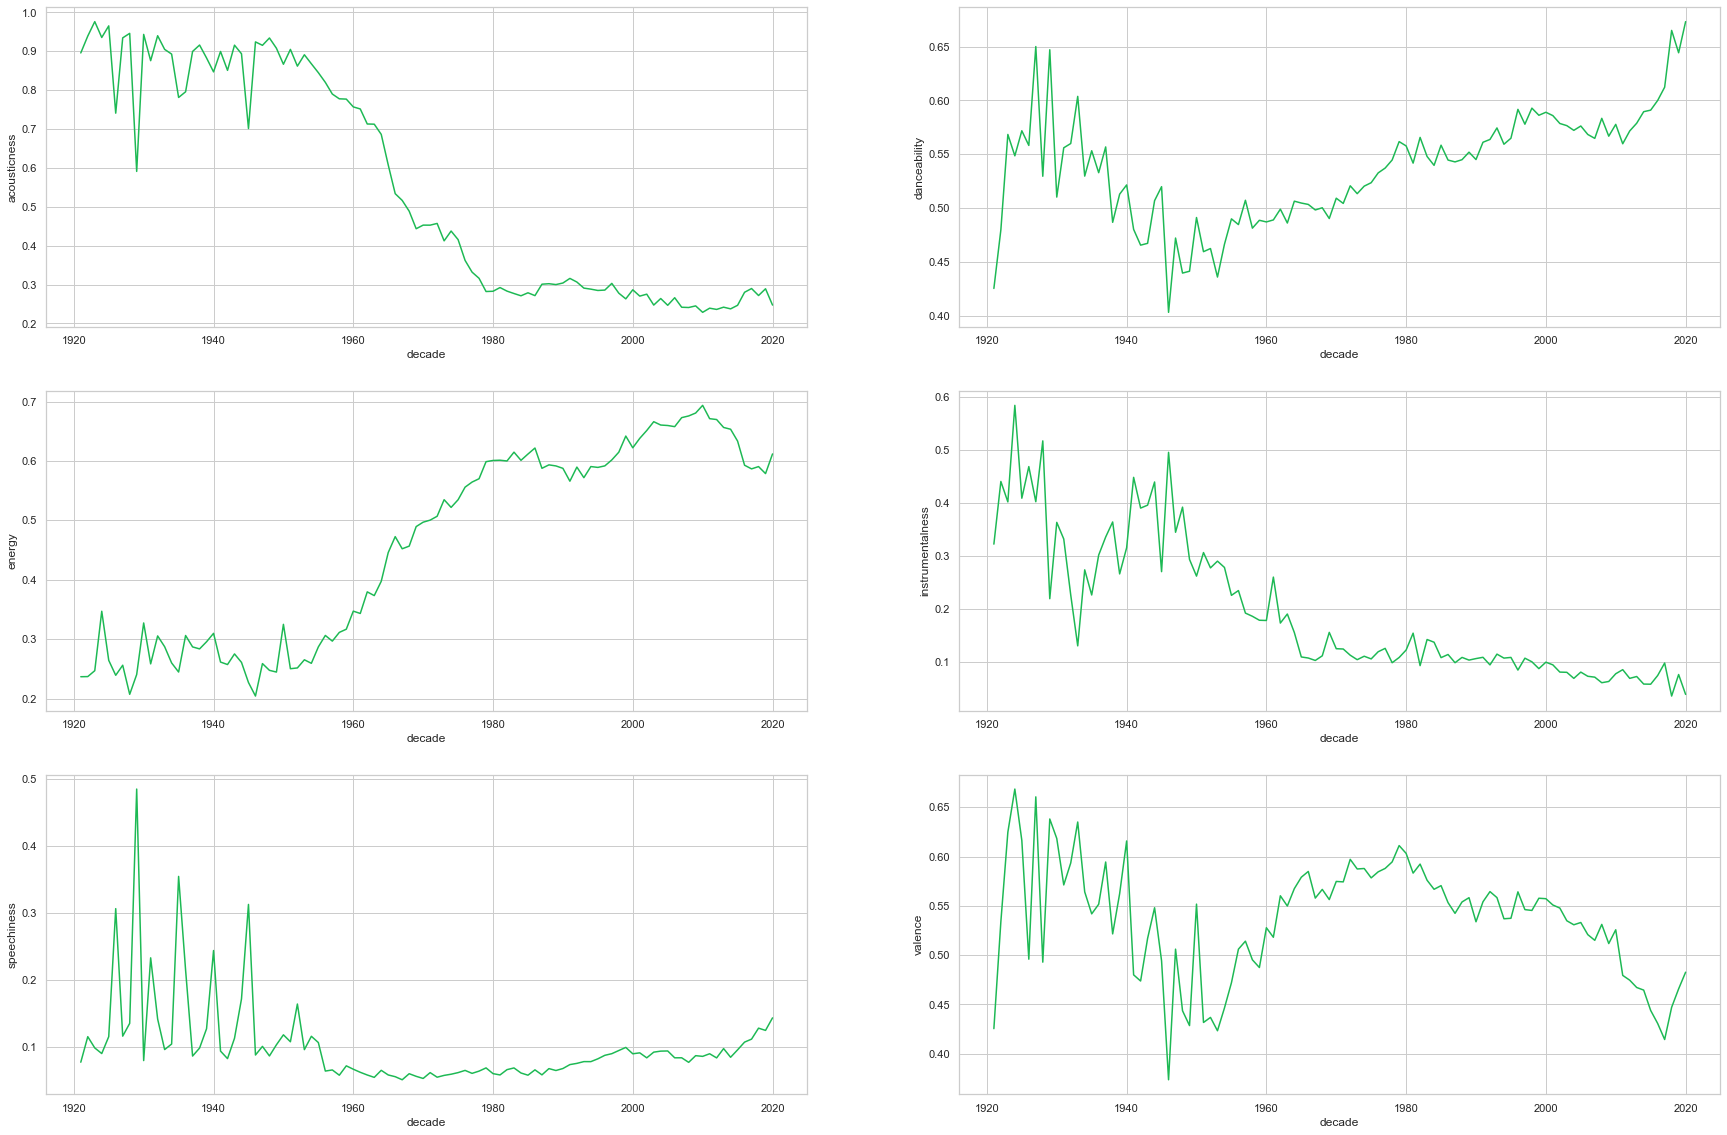

In [50]:
sp1, elements = plt.subplots(3, 2)

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements:
    main_df.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20), color="#1db954")
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

Quite a lot of graphs to unpack here, but let's run through them one by one.

Given the presented data, we can see the visible decrease in acousticness and intstrumentalness of the songs released throughout the years. And on the other hand, the increase of energy of the songs. On the more subtle note, the average tempo of the songs is seen to increase a little bit. And finally, we can see the drop of the average danceability of the songs in certain decades, along with the gradual increase of this element throughout the years. Whereas the opposite can be said for the valence of the songs where there would be an increase and then a drop of the average value within the later decades.

### EDA #2: The divide between explicit and non-explicit songs through the years.
For this analysis, we aim to find out the trend of musicians of each year when it comes to releasing explicit or non-explicit songs.                     
We do this by creating a bar graph that displays the difference of the quantity of explicit versus non-explicit songs being released per year.

Text(0.5, 1.0, 'Bar plot of explicit vs. non-explicit songs on Spotify through the years.')

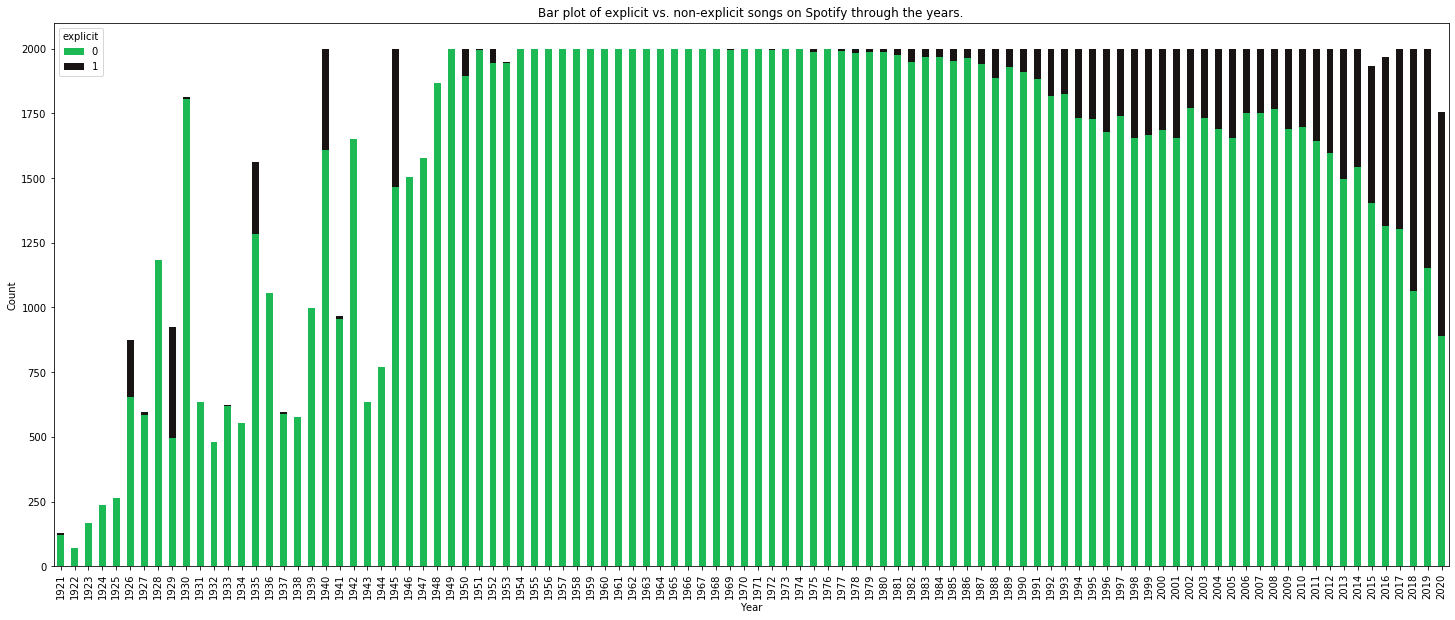

In [8]:
main_df.groupby(["year", "explicit"]).size().unstack().plot(kind="bar", stacked="True", figsize=(25,10), color=["#1db954", "#191414"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Bar plot of explicit vs. non-explicit songs on Spotify through the years.")

### EDA #3: Comparing the duration and the popularity of songs.

Text(0.5, 1.0, 'Scatterplot of the duration and the popularity of Spotify tracks.')

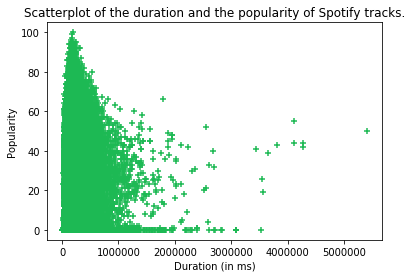

In [9]:
plt.scatter(main_df["duration_ms"], main_df["popularity"], color="#1db954", marker="+")
plt.xlabel("Duration (in ms)")
plt.ylabel("Popularity")
plt.title("Scatterplot of the duration and the popularity of Spotify tracks.")

## Further Investigation and Inference (FII) on Spotify Data

### FII #1: Is there a significant difference in popularity between explicit and non-explicit songs?

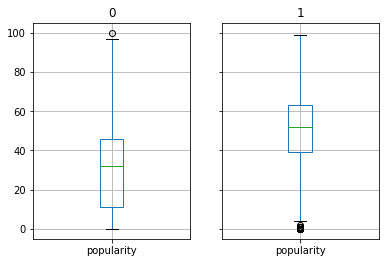

In [10]:
main_df.groupby("explicit").boxplot(column="popularity")
plt.show()

In [11]:
main_df.groupby("explicit").agg({"popularity": ["mean", "median", "std", len]})

popularity                          
               mean median        std     len
explicit                                     
0         30.149842     32  20.949669  155490
1         46.726749     52  22.464901   14419

In [12]:
46.726749 - 30.149842

16.576907

In [13]:
ttest_ind(main_df[main_df["explicit"] == 0]["popularity"],
          main_df[main_df["explicit"] == 1]["popularity"],
          equal_var = False)

Ttest_indResult(statistic=-85.23638585284675, pvalue=0.0)

### FII #2: Confidence interval for the duration of the most popular songs.

In [14]:
np.percentile(main_df["popularity"], 75)

48.0

filter popularity getting only those greater than or equal to 75% percentile; get confidence interval of duration, see if mean is within range, and draw an analysis that average length songs are indeed more popular

### FII #3: Group tracks of the same musical mode (major or minor) and divide further into musical keys to determine the most frequent emotions emitted in Spotify tracks.

### FII #4: What are the significant levels of valence given different musical mode-key combinations?